<a href="https://colab.research.google.com/github/ArturoMachuca/IA_2024_01/blob/main/PROYECTO_IA_FINAL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# INTELIGENCIA ARTIFICIAL APLICADA - ARTURO MACHUCA - 2024/01

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [48]:
df = pd.read_csv('/content/drive/MyDrive/energy_dataset.csv')

### PREPROCESAMIENTO DE DATOS

In [44]:
df

,time,generation biomass,generation fossil brown coal/lignite,generation fossil coal-derived gas,generation fossil gas,generation fossil hard coal,generation fossil oil,generation fossil oil shale,generation fossil peat,generation geothermal,...,generation waste,generation wind offshore,generation wind onshore,forecast solar day ahead,forecast wind offshore eday ahead,forecast wind onshore day ahead,total load forecast,total load actual,price day ahead,price actual
0,2015-01-01 00:00:00+01:00,447.0,329.0,0.0,4844.0,4821.0,162.0,0.0,0.0,0.0,...,196.0,0.0,6378.0,17.0,NaN,6436.0,26118.0,25385.0,50.10,65.41
1,2015-01-01 01:00:00+01:00,449.0,328.0,0.0,5196.0,4755.0,158.0,0.0,0.0,0.0,...,195.0,0.0,5890.0,16.0,NaN,5856.0,24934.0,24382.0,48.10,64.92
2,2015-01-01 02:00:00+01:00,448.0,323.0,0.0,4857.0,4581.0,157.0,0.0,0.0,0.0,...,196.0,0.0,5461.0,8.0,NaN,5454.0,23515.0,22734.0,47.33,64.48
3,2015-01-01 03:00:00+01:00,438.0,254.0,0.0,4314.0,4131.0,160.0,0.0,0.0,0.0,...,191.0,0.0,5238.0,2.0,NaN,5151.0,22642.0,21286.0,42.27,59.32
4,2015-01-01 04:00:00+01:00,428.0,187.0,0.0,4130.0,3840.0,156.0,0.0,0.0,0.0,...,189.0,0.0,4935.0,9.0,NaN,4861.0,21785.0,20264.0,38.41,56.04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35059,2018-12-31 19:00:00+01:00,297.0,0.0,0.0,7634.0,2628.0,178.0,0.0,0.0,0.0,...,277.0,0.0,3113.0,96.0,NaN,3253.0,30619.0,30653.0,68.85,77.02
35060,2018-12-31 20:00:00+01:00,296.0,0.0,0.0,7241.0,2566.0,174.0,0.0,0.0,0.0,...,280.0,0.0,3288.0,51.0,NaN,3353.0,29932.0,29735.0,68.40,76.16
35061,2018-12-31 21:00:00+01:00,292.0,0.0,0.0,7025.0,2422.0,168.0,0.0,0.0,0.0,...,286.0,0.0,3503.0,36.0,NaN,3404.0,27903.0,28071.0,66.88,74.30
35062,2018-12-31 22:00:00+01:00,293.0,0.0,0.0,6562.0,2293.0,163.0,0.0,0.0,0.0,...,287.0,0.0,3586.0,29.0,NaN,3273.0,25450.0,25801.0,63.93,69.89


In [49]:
df.time = pd.to_datetime(df.time, utc = True, infer_datetime_format= True)
df = df.set_index('time')
df.head()

<ipython-input-49-837adc7495bc>:1: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df.time = pd.to_datetime(df.time, utc = True, infer_datetime_format= True)


,generation biomass,generation fossil brown coal/lignite,generation fossil coal-derived gas,generation fossil gas,generation fossil hard coal,generation fossil oil,generation fossil oil shale,generation fossil peat,generation geothermal,generation hydro pumped storage aggregated,...,generation waste,generation wind offshore,generation wind onshore,forecast solar day ahead,forecast wind offshore eday ahead,forecast wind onshore day ahead,total load forecast,total load actual,price day ahead,price actual
time,,,,,,,,,,,,,,,,,,,,,
2014-12-31 23:00:00+00:00,447.0,329.0,0.0,4844.0,4821.0,162.0,0.0,0.0,0.0,NaN,...,196.0,0.0,6378.0,17.0,NaN,6436.0,26118.0,25385.0,50.10,65.41
2015-01-01 00:00:00+00:00,449.0,328.0,0.0,5196.0,4755.0,158.0,0.0,0.0,0.0,NaN,...,195.0,0.0,5890.0,16.0,NaN,5856.0,24934.0,24382.0,48.10,64.92
2015-01-01 01:00:00+00:00,448.0,323.0,0.0,4857.0,4581.0,157.0,0.0,0.0,0.0,NaN,...,196.0,0.0,5461.0,8.0,NaN,5454.0,23515.0,22734.0,47.33,64.48
2015-01-01 02:00:00+00:00,438.0,254.0,0.0,4314.0,4131.0,160.0,0.0,0.0,0.0,NaN,...,191.0,0.0,5238.0,2.0,NaN,5151.0,22642.0,21286.0,42.27,59.32
2015-01-01 03:00:00+00:00,428.0,187.0,0.0,4130.0,3840.0,156.0,0.0,0.0,0.0,NaN,...,189.0,0.0,4935.0,9.0,NaN,4861.0,21785.0,20264.0,38.41,56.04


In [29]:
df.isnull().sum() #NaN

generation biomass                                19
generation fossil brown coal/lignite              18
generation fossil coal-derived gas                18
generation fossil gas                             18
generation fossil hard coal                       18
generation fossil oil                             19
generation fossil oil shale                       18
generation fossil peat                            18
generation geothermal                             18
generation hydro pumped storage aggregated     35064
generation hydro pumped storage consumption       19
generation hydro run-of-river and poundage        19
generation hydro water reservoir                  18
generation marine                                 19
generation nuclear                                17
generation other                                  18
generation other renewable                        18
generation solar                                  18
generation waste                              

Recuento de datos nulos

In [30]:
for column_name in df.columns:
    column = df[column_name]
    # Get the count of Zeros in column
    count = (column == 0).sum()
    print(f"{column_name:{50}} : {count}")

generation biomass                                 : 4
generation fossil brown coal/lignite               : 10517
generation fossil coal-derived gas                 : 35046
generation fossil gas                              : 1
generation fossil hard coal                        : 3
generation fossil oil                              : 3
generation fossil oil shale                        : 35046
generation fossil peat                             : 35046
generation geothermal                              : 35046
generation hydro pumped storage aggregated         : 0
generation hydro pumped storage consumption        : 12607
generation hydro run-of-river and poundage         : 3
generation hydro water reservoir                   : 3
generation marine                                  : 35045
generation nuclear                                 : 3
generation other                                   : 4
generation other renewable                         : 3
generation solar                     

In [31]:
df.drop(['generation hydro pumped storage aggregated', 'forecast wind offshore eday ahead',
           'generation wind offshore', 'generation fossil coal-derived gas',
           'generation fossil oil shale', 'generation fossil peat', 'generation marine',
           'generation wind offshore', 'generation geothermal'], inplace = True, axis = 1)

In [32]:
df.isnull().sum()

generation biomass                             19
generation fossil brown coal/lignite           18
generation fossil gas                          18
generation fossil hard coal                    18
generation fossil oil                          19
generation hydro pumped storage consumption    19
generation hydro run-of-river and poundage     19
generation hydro water reservoir               18
generation nuclear                             17
generation other                               18
generation other renewable                     18
generation solar                               18
generation waste                               19
generation wind onshore                        18
forecast solar day ahead                        0
forecast wind onshore day ahead                 0
total load forecast                             0
total load actual                              36
price day ahead                                 0
price actual                                    0


Graficos y datos faltantes

In [33]:
plt.rcParams['figure.figsize'] = (15, 5)

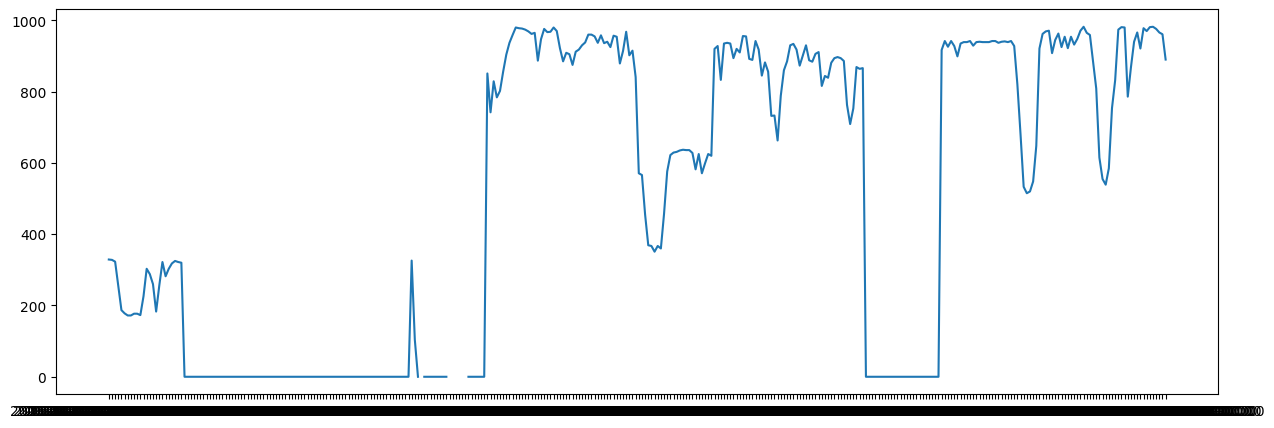

In [34]:
plt.plot(df['generation fossil brown coal/lignite'][:24*7*2])
plt.show()

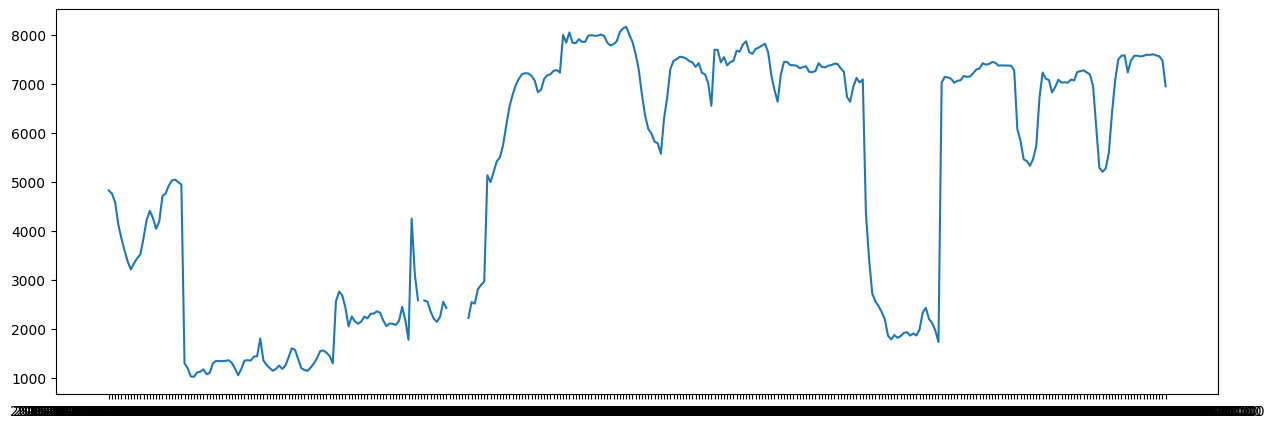

In [35]:
plt.plot(df['generation fossil hard coal'][:24*7*2])
plt.show()

Interpolación con spline de orden 1 para completar datos faltantes

In [50]:
df.interpolate(method='slinear', limit_direction='forward', inplace=True, axis=0)

Revisamos los mismos graficos...

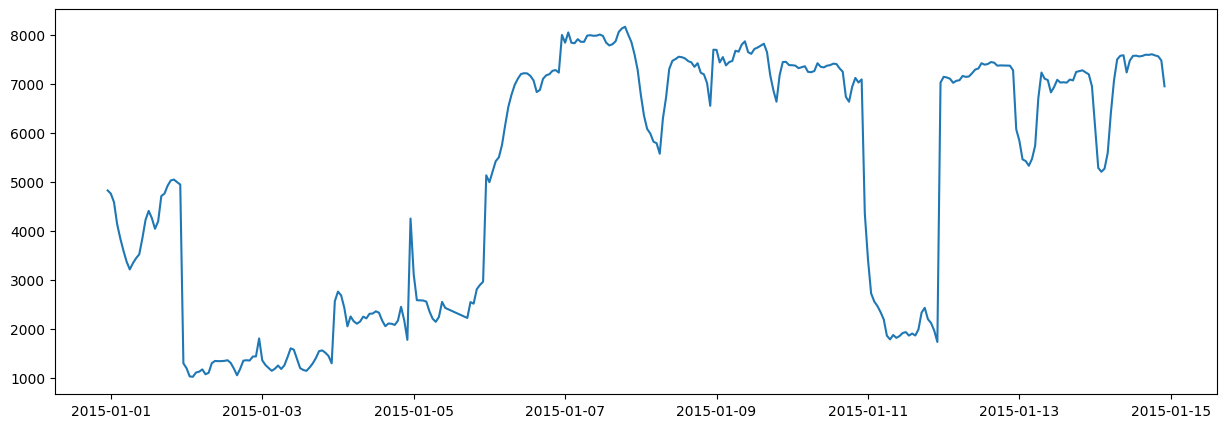

In [51]:
plt.plot(df['generation fossil hard coal'][:24*7*2])
plt.show()

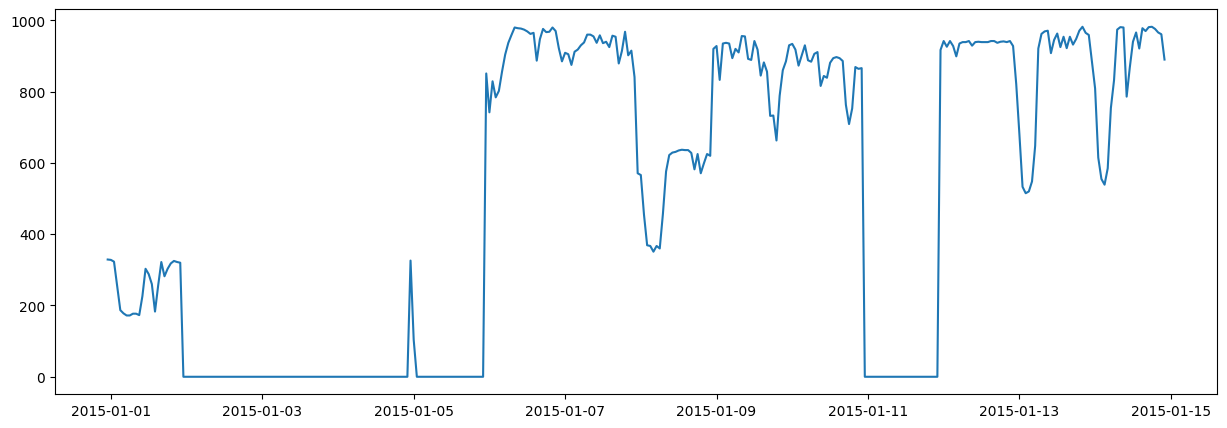

In [52]:
plt.plot(df['generation fossil brown coal/lignite'][:24*7*2])
plt.show()

In [54]:
df.columns

Index(['generation biomass', 'generation fossil brown coal/lignite',
       'generation fossil coal-derived gas', 'generation fossil gas',
       'generation fossil hard coal', 'generation fossil oil',
       'generation fossil oil shale', 'generation fossil peat',
       'generation geothermal', 'generation hydro pumped storage aggregated',
       'generation hydro pumped storage consumption',
       'generation hydro run-of-river and poundage',
       'generation hydro water reservoir', 'generation marine',
       'generation nuclear', 'generation other', 'generation other renewable',
       'generation solar', 'generation waste', 'generation wind offshore',
       'generation wind onshore', 'forecast solar day ahead',
       'forecast wind offshore eday ahead', 'forecast wind onshore day ahead',
       'total load forecast', 'total load actual', 'price day ahead',
       'price actual'],
      dtype='object')

In [56]:
df.describe()

,generation biomass,generation fossil brown coal/lignite,generation fossil coal-derived gas,generation fossil gas,generation fossil hard coal,generation fossil oil,generation fossil oil shale,generation fossil peat,generation geothermal,generation hydro pumped storage aggregated,...,generation waste,generation wind offshore,generation wind onshore,forecast solar day ahead,forecast wind offshore eday ahead,forecast wind onshore day ahead,total load forecast,total load actual,price day ahead,price actual
count,35064.000000,35064.000000,35064.0,35064.000000,35064.000000,35064.000000,35064.0,35064.0,35064.0,0.0,...,35064.000000,35064.0,35064.000000,35064.000000,0.0,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000
mean,383.531343,448.094570,0.0,5622.700647,4256.531271,298.342417,0.0,0.0,0.0,NaN,...,269.418692,0.0,5464.980450,1439.066735,NaN,5471.216689,28712.129962,28698.281385,49.874341,57.884023
std,85.346266,354.618269,0.0,2201.510984,1961.988937,52.519927,0.0,0.0,0.0,NaN,...,50.218423,0.0,3213.586296,1677.703355,NaN,3176.312853,4594.100854,4575.828854,14.618900,14.204083
min,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,NaN,...,0.000000,0.0,0.000000,0.000000,NaN,237.000000,18105.000000,18041.000000,2.060000,9.330000
25%,333.000000,0.000000,0.0,4126.000000,2527.000000,263.000000,0.0,0.0,0.0,NaN,...,240.000000,0.0,2933.000000,69.000000,NaN,2979.000000,24793.750000,24807.000000,41.490000,49.347500
50%,367.000000,509.000000,0.0,4969.500000,4475.000000,300.000000,0.0,0.0,0.0,NaN,...,279.000000,0.0,4849.500000,576.000000,NaN,4855.000000,28906.000000,28902.000000,50.520000,58.020000
75%,433.000000,757.000000,0.0,6429.000000,5839.000000,330.000000,0.0,0.0,0.0,NaN,...,310.000000,0.0,7399.500000,2636.000000,NaN,7353.000000,32263.250000,32194.250000,60.530000,68.010000
max,592.000000,999.000000,0.0,20034.000000,8359.000000,449.000000,0.0,0.0,0.0,NaN,...,357.000000,0.0,17436.000000,5836.000000,NaN,17430.000000,41390.000000,41015.000000,101.990000,116.800000


In [57]:
df.drop(['generation hydro pumped storage aggregated', 'forecast wind offshore eday ahead'], axis=1,inplace=True)

In [58]:
df.describe()

,generation biomass,generation fossil brown coal/lignite,generation fossil coal-derived gas,generation fossil gas,generation fossil hard coal,generation fossil oil,generation fossil oil shale,generation fossil peat,generation geothermal,generation hydro pumped storage consumption,...,generation solar,generation waste,generation wind offshore,generation wind onshore,forecast solar day ahead,forecast wind onshore day ahead,total load forecast,total load actual,price day ahead,price actual
count,35064.000000,35064.000000,35064.0,35064.000000,35064.000000,35064.000000,35064.0,35064.0,35064.0,35064.000000,...,35064.000000,35064.000000,35064.0,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000
mean,383.531343,448.094570,0.0,5622.700647,4256.531271,298.342417,0.0,0.0,0.0,475.582706,...,1432.818546,269.418692,0.0,5464.980450,1439.066735,5471.216689,28712.129962,28698.281385,49.874341,57.884023
std,85.346266,354.618269,0.0,2201.510984,1961.988937,52.519927,0.0,0.0,0.0,792.312704,...,1679.961733,50.218423,0.0,3213.586296,1677.703355,3176.312853,4594.100854,4575.828854,14.618900,14.204083
min,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,237.000000,18105.000000,18041.000000,2.060000,9.330000
25%,333.000000,0.000000,0.0,4126.000000,2527.000000,263.000000,0.0,0.0,0.0,0.000000,...,71.000000,240.000000,0.0,2933.000000,69.000000,2979.000000,24793.750000,24807.000000,41.490000,49.347500
50%,367.000000,509.000000,0.0,4969.500000,4475.000000,300.000000,0.0,0.0,0.0,68.000000,...,616.000000,279.000000,0.0,4849.500000,576.000000,4855.000000,28906.000000,28902.000000,50.520000,58.020000
75%,433.000000,757.000000,0.0,6429.000000,5839.000000,330.000000,0.0,0.0,0.0,616.000000,...,2579.000000,310.000000,0.0,7399.500000,2636.000000,7353.000000,32263.250000,32194.250000,60.530000,68.010000
max,592.000000,999.000000,0.0,20034.000000,8359.000000,449.000000,0.0,0.0,0.0,4523.000000,...,5792.000000,357.000000,0.0,17436.000000,5836.000000,17430.000000,41390.000000,41015.000000,101.990000,116.800000


In [65]:
df['total generation'] = df['generation biomass'] + df['generation fossil brown coal/lignite'] + df['generation fossil gas'] + df['generation fossil hard coal'] + df['generation fossil oil'] + df['generation hydro pumped storage consumption'] + df['generation hydro run-of-river and poundage'] + df['generation hydro water reservoir'] + df['generation nuclear'] + df['generation other'] + df['generation other renewable'] + df['generation solar'] + df['generation waste'] + df['generation wind onshore']

GRAFICOS

In [59]:
import seaborn as sns

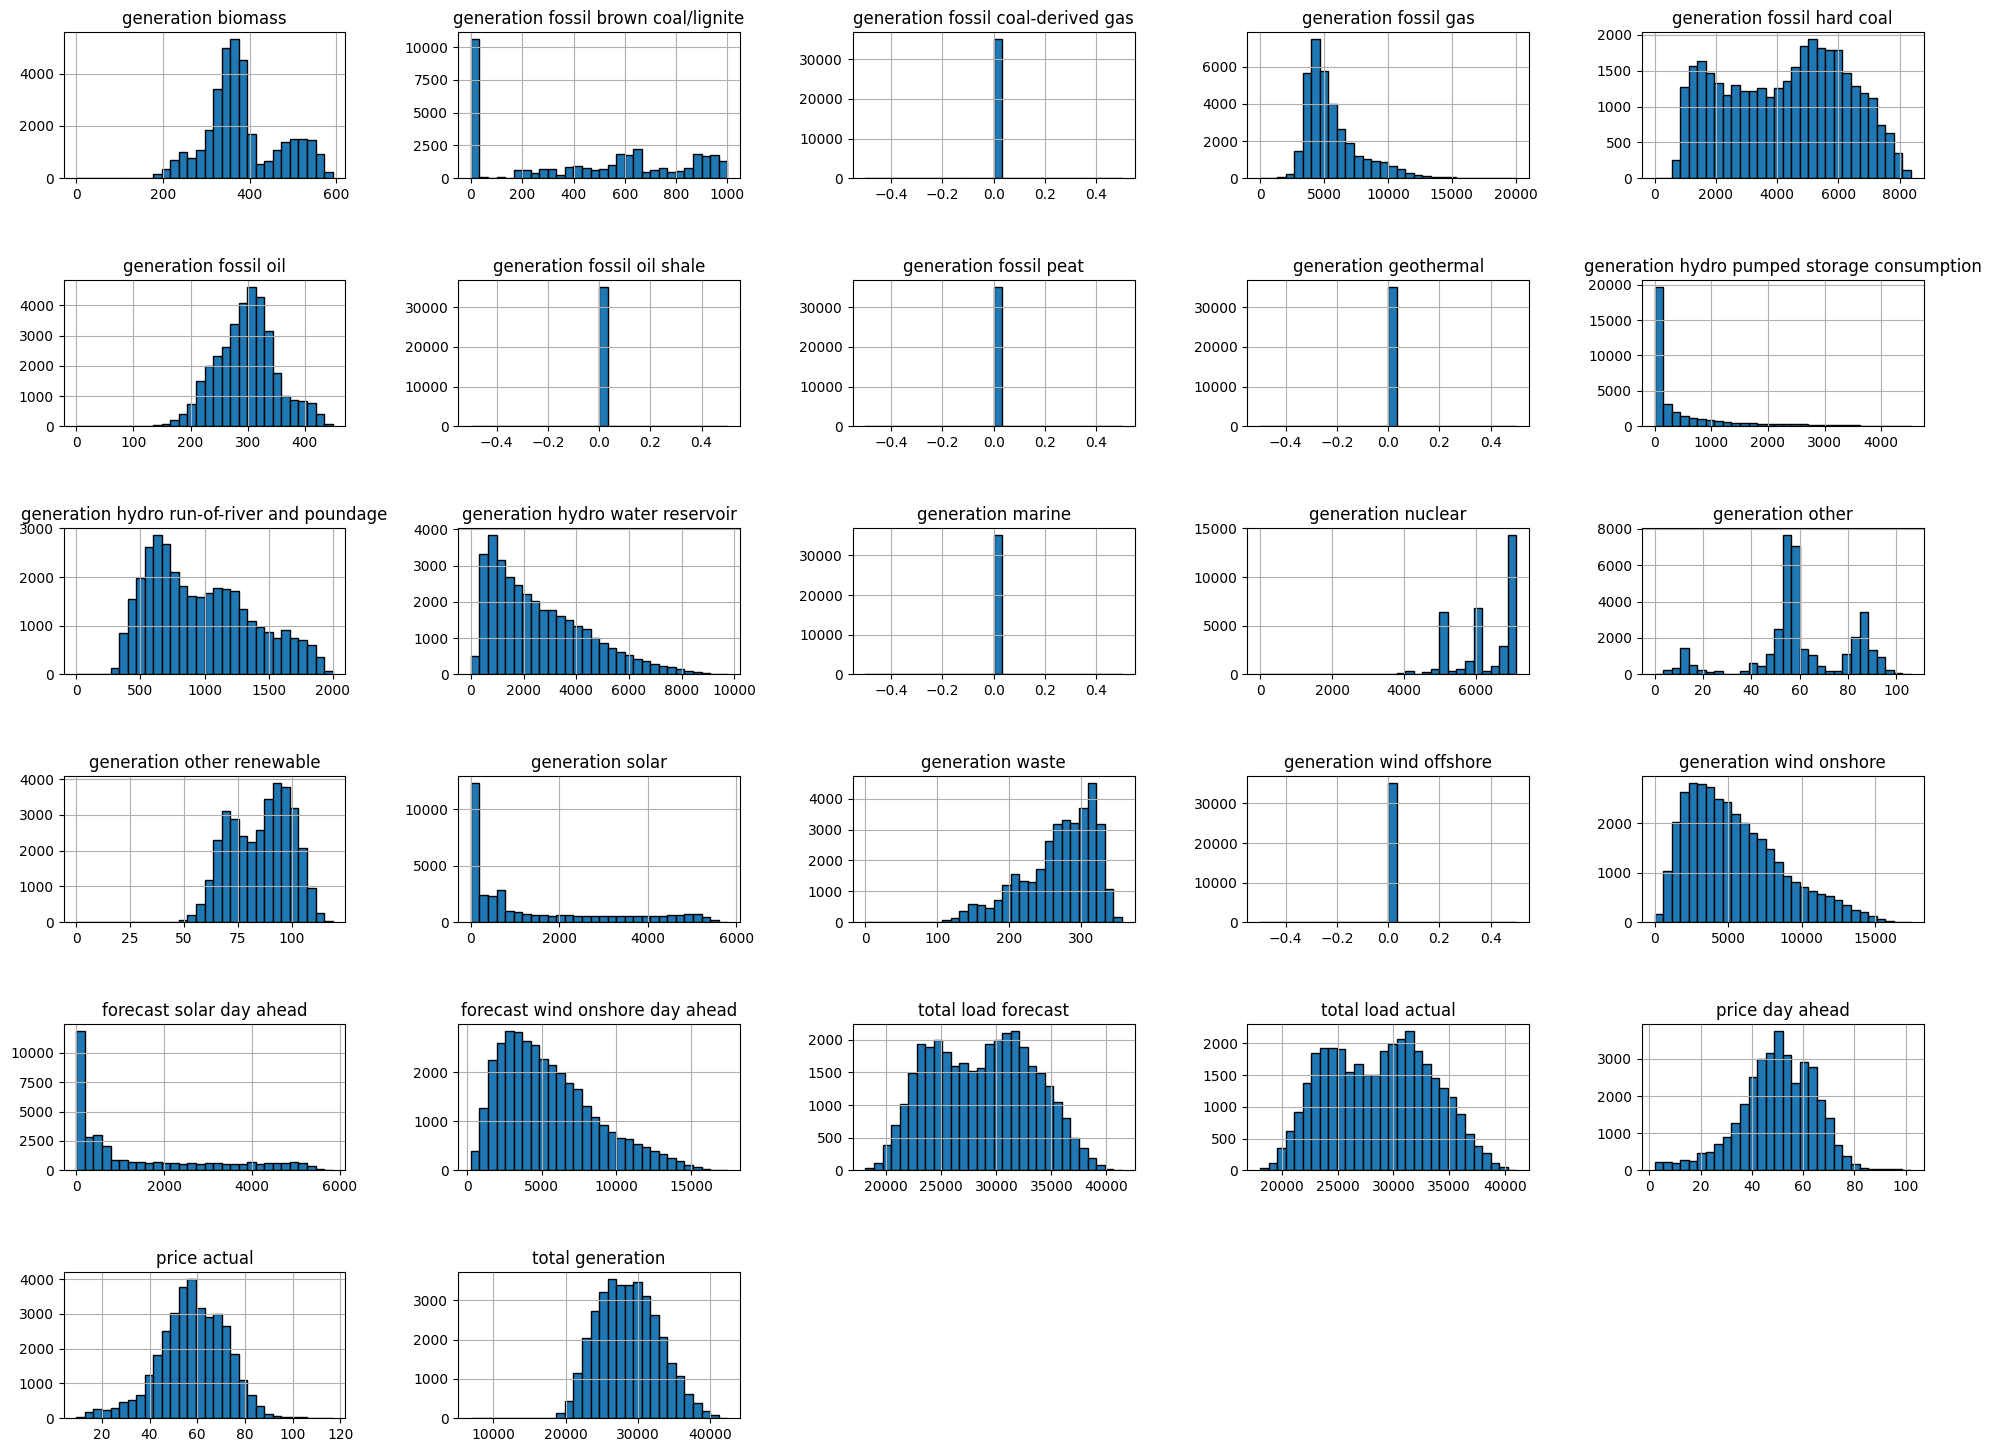

In [67]:
df.hist(figsize=(24,18), bins = 30, edgecolor='black')
plt.subplots_adjust(hspace=0.7, wspace=0.4)

<Axes: xlabel='price actual', ylabel='Count'>

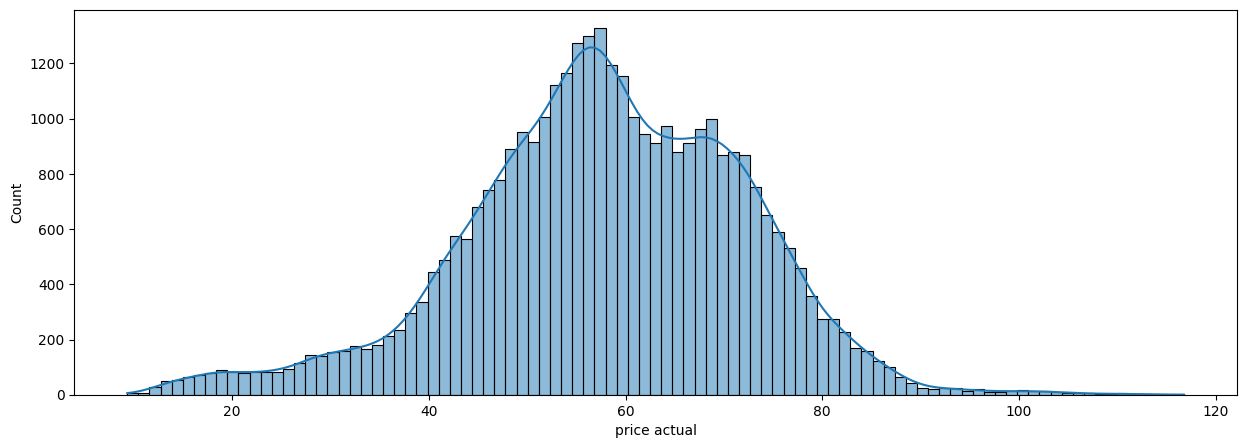

In [62]:
sns.histplot(df['price actual'], kde=True)

<Axes: xlabel='total generation', ylabel='Count'>

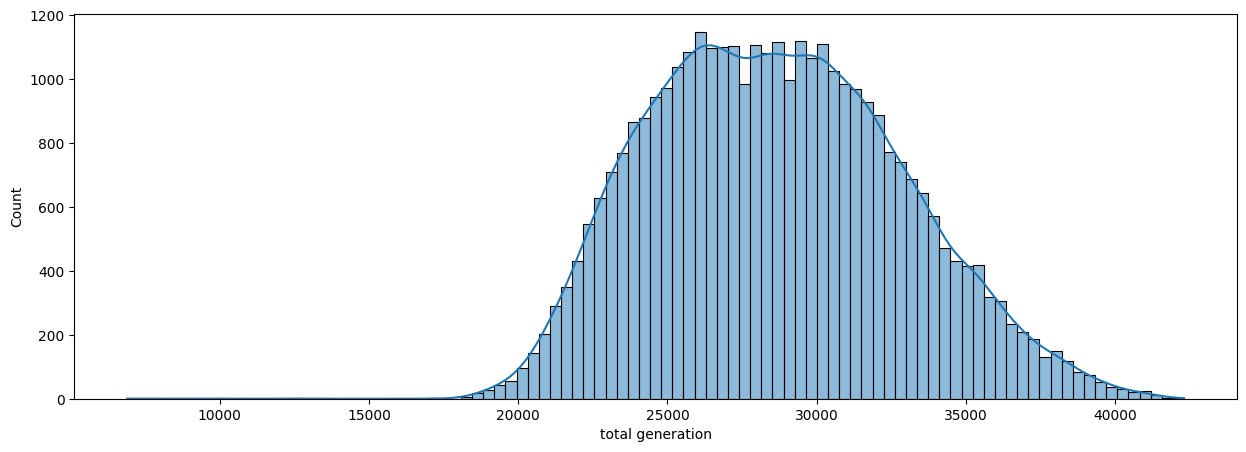

In [68]:
sns.histplot(df['total generation'], kde=True)

Utilizamos ```rolling()``` para generar un promedio móvil



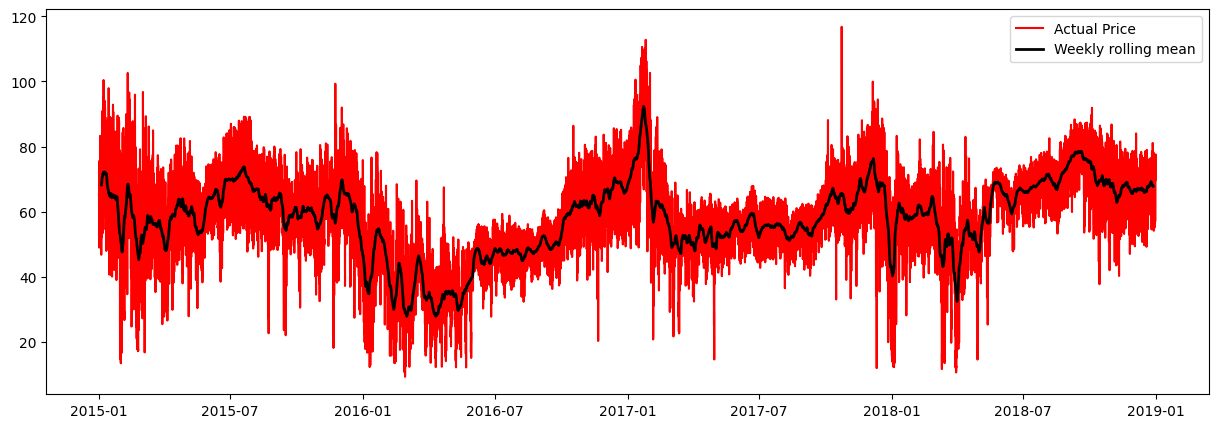

In [72]:
fig, ax = plt.subplots(1,1)
weekly_rolling_mean = df['price actual'].rolling(24*7, center = True).mean()
ax.plot(df['price actual'], color = 'red', label='Actual Price')
ax.plot(weekly_rolling_mean, color = 'black', linestyle='-', linewidth=2, label='Weekly rolling mean')
plt.legend()
plt.show()

Lagged features

[]

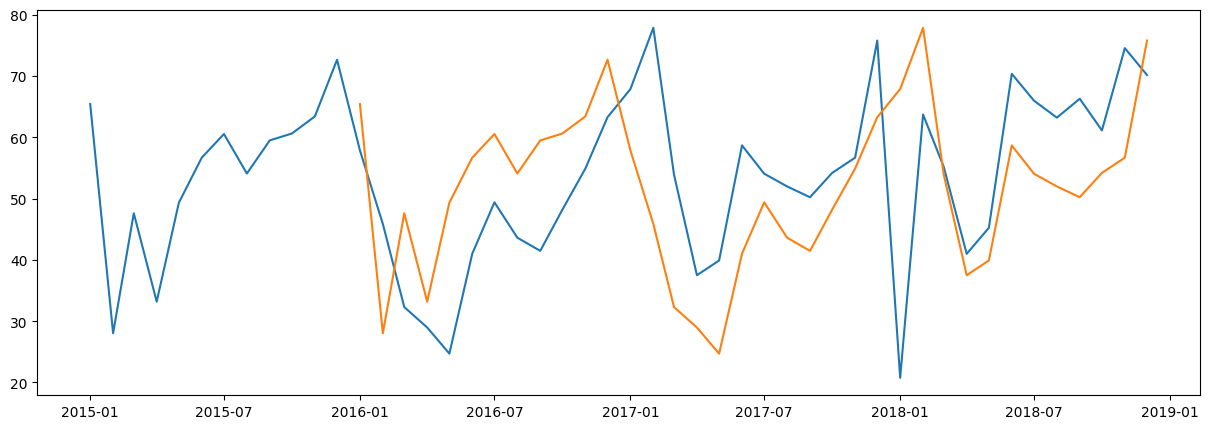

In [76]:
monthly_price = df['price actual'].asfreq('M')
lagged_m = monthly_price.shift(12)

fig, ax = plt.subplots(1,1)
ax.plot(monthly_price, label = 'Monthly Price')
ax.plot(lagged_m, label ='1 yr lagged')
plt.plot()

[]

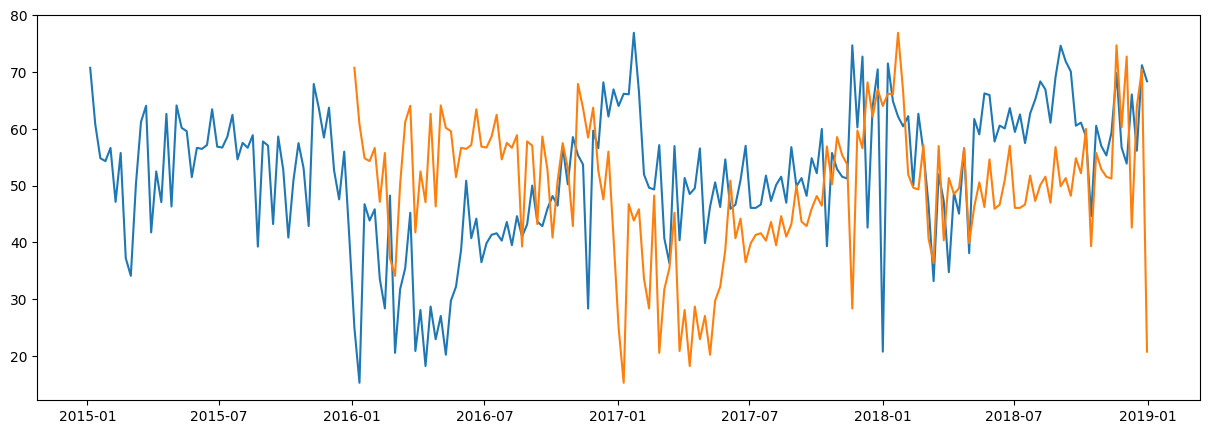

In [78]:
weekly_price = df['price actual'].asfreq('W')
lagged_w = weekly_price.shift(52)

fig, ax = plt.subplots(1,1)
ax.plot(weekly_price, label = 'Weekly Price')
ax.plot(lagged_w, label ='1 yr lagged')
plt.plot()

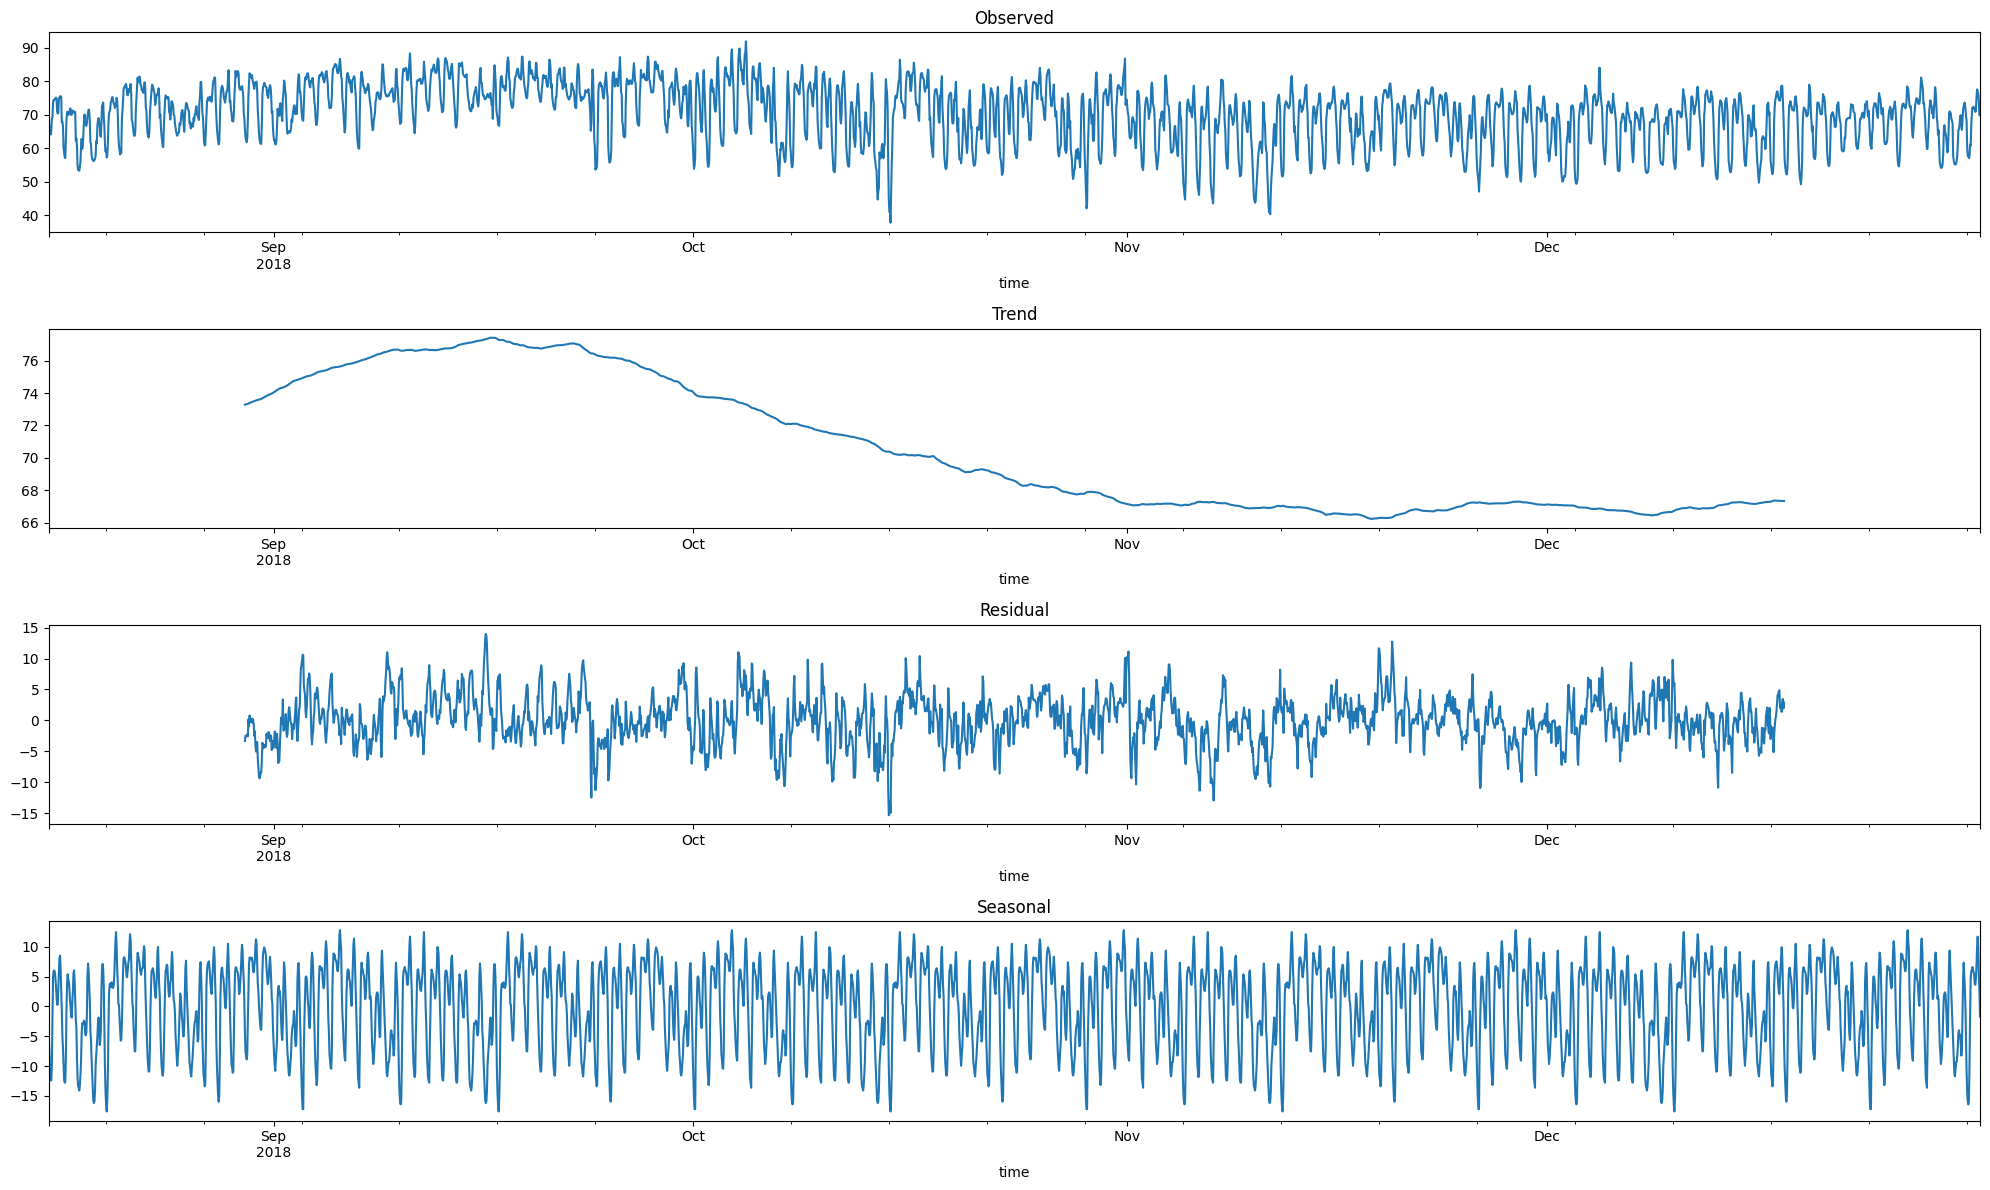

In [116]:
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose

decomp = sm.tsa.seasonal_decompose(df['price actual']['2018-08-16 00:00:00+01:00': ], model='Additive', period=24*7*4)

fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(20, 12))
decomp.observed.plot(ax=ax1, title='Observed')
decomp.trend.plot(ax=ax2, title='Trend')
decomp.resid.plot(ax=ax3, title='Residual')
decomp.seasonal.plot(ax=ax4, title='Seasonal')
plt.tight_layout()
plt.show()

In [88]:
df_train = df['price actual']['2015-01-01 00:00:00+01:00':'2018-08-16 00:00:00+01:00'	]
df_test = df['price actual']['2018-08-16 00:00:00+01:00':	]

In [92]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller

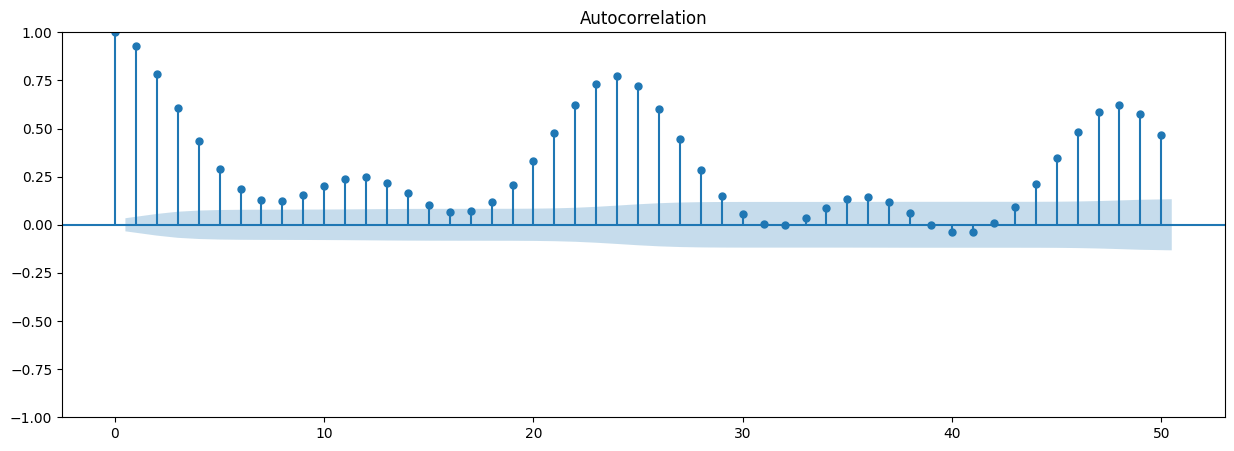

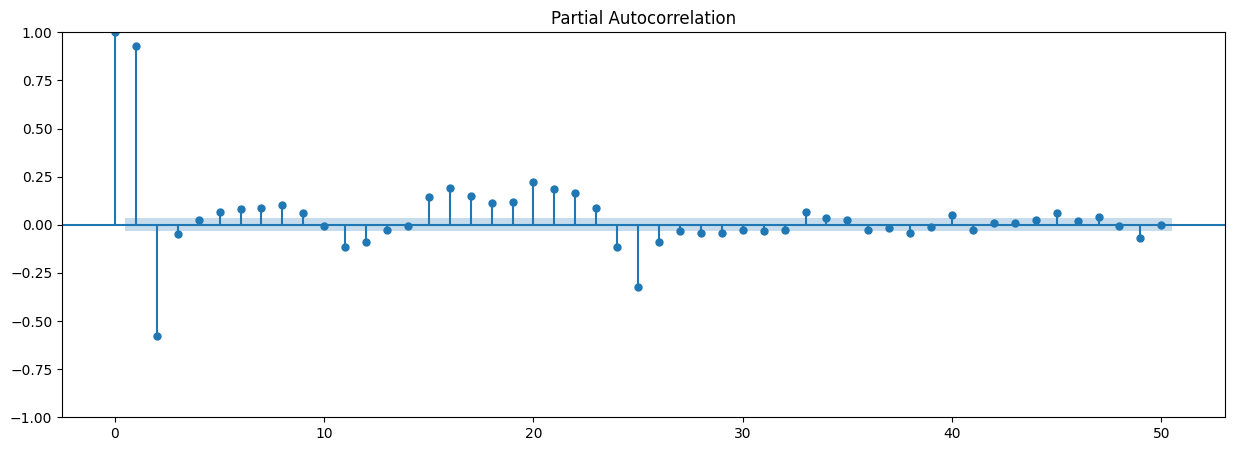

In [95]:
acf_train = plot_acf(df_test,lags=50)
pacf_train = plot_pacf(df_test,lags=50)

In [94]:
adf_test = adfuller(df_train)
print(f'p-value: {adf_test[1]}')

p-value: 2.2502951235038377e-15


Esto indica que la serie temporal es estacionaria

### MODELO

In [98]:
from statsmodels.tsa.arima_model import ARIMA

In [182]:
model = sm.tsa.SARIMAX(df_train.asfreq('W'), order=(2,1,1), seasonal_order=(1,1,1,16))
## SARIMAX(2, 1, 1)x(1, 1, 1, 16) : AIC ---->  1306.560

In [178]:
pred_sarimax = model.fit()
print(pred_sarimax.summary())

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


                                     SARIMAX Results                                      
Dep. Variable:                       price actual   No. Observations:                  189
Model:             SARIMAX(2, 1, 1)x(1, 1, 1, 16)   Log Likelihood                -647.280
Date:                            Thu, 06 Jun 2024   AIC                           1306.560
Time:                                    04:03:42   BIC                           1325.445
Sample:                                01-04-2015   HQIC                          1314.222
                                     - 08-12-2018                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1385      0.164     -0.845      0.398      -0.460       0.183
ar.L2         -0.0272      0.125   

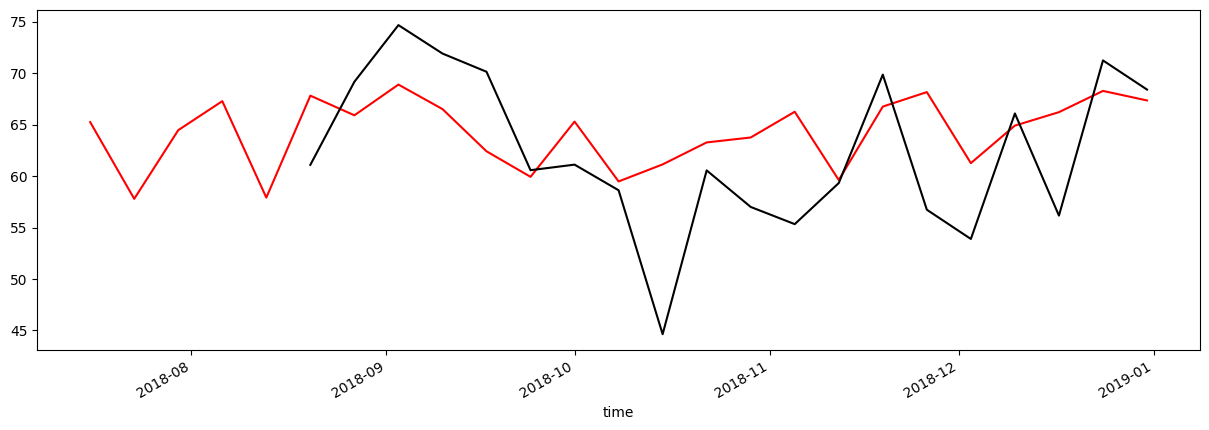

In [183]:
aber = pred_sarimax.predict(start='2018-07-16 00:00:00+01:00', end='2018-12-31 22:00:00+00:00	')

aber.plot(color='red')
df_test.asfreq('W').plot(color='black')
plt.show()